# Diabetes Risk Detection Project
## Project Overview
### Objective:
The goal of this project is to predict whether a person is at risk of developing diabetes based on their health data. Using a dataset with key health metrics, we aim to help identify potential diabetes risks early on.

### Problem Statement:
Diabetes is a serious health condition that can lead to life-threatening complications if not managed in time. The problem we are solving is to analyze various health indicators such as glucose levels, BMI, and age to predict whether someone is likely to develop diabetes. This helps in early detection and prevention.

### Key Stakeholders:
The main people who will benefit from this analysis are healthcare providers and individuals looking to monitor their diabetes risk. The project may also interest researchers or anyone in the healthcare field aiming to understand diabetes better.

### Expected Outcomes:
The project should deliver insights into which health factors are most strongly linked to diabetes risk. We will also provide a model that can predict a person's likelihood of having diabetes based on their health metrics, giving healthcare providers and patients actionable information to guide their next steps.

## Data Collection & Loading
### Data Sources:
The dataset used in this project is a CSV file called diabetes.csv. It contains health data for 768 individuals, including factors like pregnancies, glucose levels, blood pressure, BMI, insulin levels, and whether the individual has diabetes (indicated by the 'Outcome' column)

### Loading the Data:
To load the data into the environment, follow these steps:

1. First, import the necessary libraries like pandas.
2. Use the pandas.read_csv() function to load the dataset from the CSV file.
3. After loading, review the dataset by calling df.head() to ensure it’s loaded correctly and check the first few rows.
4. Optionally, use df.info() to confirm the data types and check for any missing values or anomalies.

In [53]:
# Load the data
import pandas as pd
data = pd.read_csv("diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Description

### Data Structure:
- **Number of records (rows)**: 768
- **Number of features (columns)**: 9

### Variable Description:
| Variable Name               | Description                                                                 | Data Type  |
|-----------------------------|-----------------------------------------------------------------------------|------------|
| `Pregnancies`               | Number of times the patient has been pregnant                               | Numerical  |
| `Glucose`                   | Plasma glucose concentration (mg/dL) measured after 2 hours in an oral test | Numerical  |
| `BloodPressure`             | Diastolic blood pressure (mm Hg)                                            | Numerical  |
| `SkinThickness`             | Skinfold thickness (mm) measured on the triceps                             | Numerical  |
| `Insulin`                   | Serum insulin levels (mu U/ml)                                              | Numerical  |
| `BMI`                       | Body Mass Index (weight in kg/height in m²)                                 | Numerical  |
| `DiabetesPedigreeFunction`  | A score indicating the likelihood of diabetes based on family history       | Numerical  |
| `Age`                       | Age of the individual in years                                              | Numerical  |
| `Outcome`                   | 1 indicates the individual has diabetes, 0 means no diabetes                | Categorical |


In [41]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
print("Number of people who have diabetes:", sum(data['Outcome']==1))
print("Number of people who don't have diabetes:", sum(data['Outcome']==0))

Number of people who have diabetes: 268
Number of people who don't have diabetes: 500


## Data Cleaning & Preprocessing
### Handling Missing Data:
In this dataset, there are no explicit missing values as seen from the data.info() output. However, certain columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have zeros, which are not feasible for biological measurements. These zeros can be considered as missing values that need to be handled.

To address these:

- Replace zeros with the median value for each class's feature (this method is robust to outliers).

### Handling Outliers:
Outliers were detected using the Interquartile Range (IQR) method, as shown earlier in the detect_outliers_iqr function. For this project, depending on the analysis, you can either:

- Keep the outliers: Outliers may be critical in medical data as extreme values could indicate potential medical conditions.
- Cap the outliers: This involves capping extreme values to the 5th or 95th percentile to prevent skewing the model.


In [56]:
# Columns where zeros are biologically not feasible and should be treated as missing values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Function to replace zeros with the median of the same class (Outcome)
def replace_zeros_with_median_by_class(df, columns, class_column='Outcome'):
    for column in columns:
        # Calculate medians for each class (Outcome 0 and 1)
        median_class_0 = df[df[class_column] == 0][column].median()
        median_class_1 = df[df[class_column] == 1][column].median()
        
        # Replace zeros with the respective class median
        df.loc[(df[class_column] == 0) & (df[column] == 0), column] = median_class_0
        df.loc[(df[class_column] == 1) & (df[column] == 0), column] = median_class_1

# Apply the function to replace zeros in the specified columns
replace_zeros_with_median_by_class(data, columns_with_zeros)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,91.783854,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,108.121136,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Features')

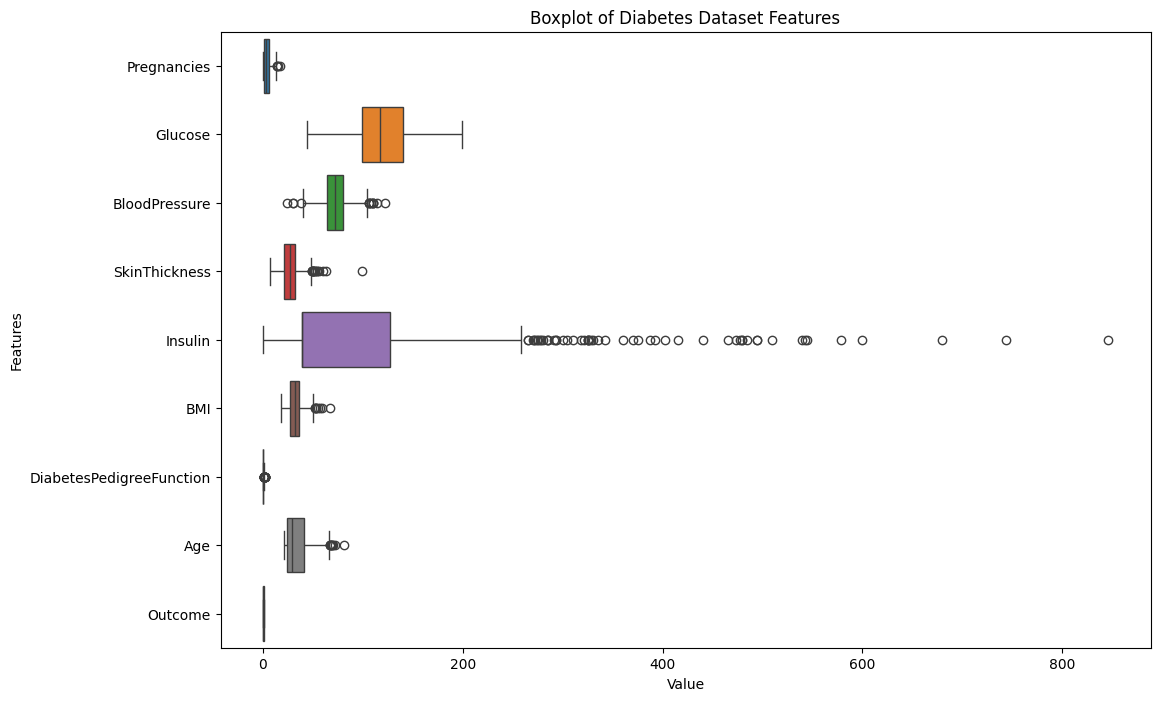

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a boxplot for all columns
sns.boxplot(data=data, orient='h')

# Add labels and title
plt.title('Boxplot of Diabetes Dataset Features')
plt.xlabel('Value')
plt.ylabel('Features')

In [58]:
def detect_outliers_iqr(df):
    outlier_counts = {}
    
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers
        outlier_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
        outlier_counts[column] = outlier_count
    
    return outlier_counts

In [59]:
detect_outliers_iqr(data)

{'Pregnancies': 4,
 'Glucose': 0,
 'BloodPressure': 14,
 'SkinThickness': 15,
 'Insulin': 54,
 'BMI': 8,
 'DiabetesPedigreeFunction': 29,
 'Age': 9,
 'Outcome': 0}

In [60]:
def cap_outliers(df):
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap the outliers
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
        

cap_outliers(data)

# Exploratory Data Analysis (EDA)
## Summary Statistics:
## Summary Statistics

### Numerical Data

| Feature                   | Count  | Mean    | Std      | Min   | 25%    | 50%    | 75%    | Max   |
|---------------------------|--------|---------|----------|-------|--------|--------|--------|-------|
| **Pregnancies**            | 768    | 3.85    | 3.37     | 0     | 1      | 3      | 6      | 17    |
| **Glucose**                | 768    | 121.68  | 30.46    | 44    | 99.75  | 117    | 140.25 | 199   |
| **BloodPressure**          | 768    | 72.38   | 12.10    | 24    | 64     | 72     | 80     | 122   |
| **SkinThickness**          | 768    | 27.43   | 9.32     | 7     | 21     | 27     | 32     | 99    |
| **Insulin**                | 768    | 91.78   | 108.12   | 0     | 39     | 39     | 127.25 | 846   |
| **BMI**                    | 768    | 32.43   | 6.88     | 18.2  | 27.5   | 32.05  | 36.6   | 67.1  |
| **DiabetesPedigreeFunction**| 768    | 0.47    | 0.33     | 0.078 | 0.244  | 0.373  | 0.626  | 2.42  |
| **Age**                    | 768    | 33.24   | 11.76    | 21    | 24     | 29     | 41     | 81    |

### Categorical Data

| Feature    | Unique Values | Most Frequent Value | Frequency of Most Frequent Value |
|------------|---------------|---------------------|----------------------------------|
| **Outcome**| 2             | 0                   | 500                              |


## Visualizations:


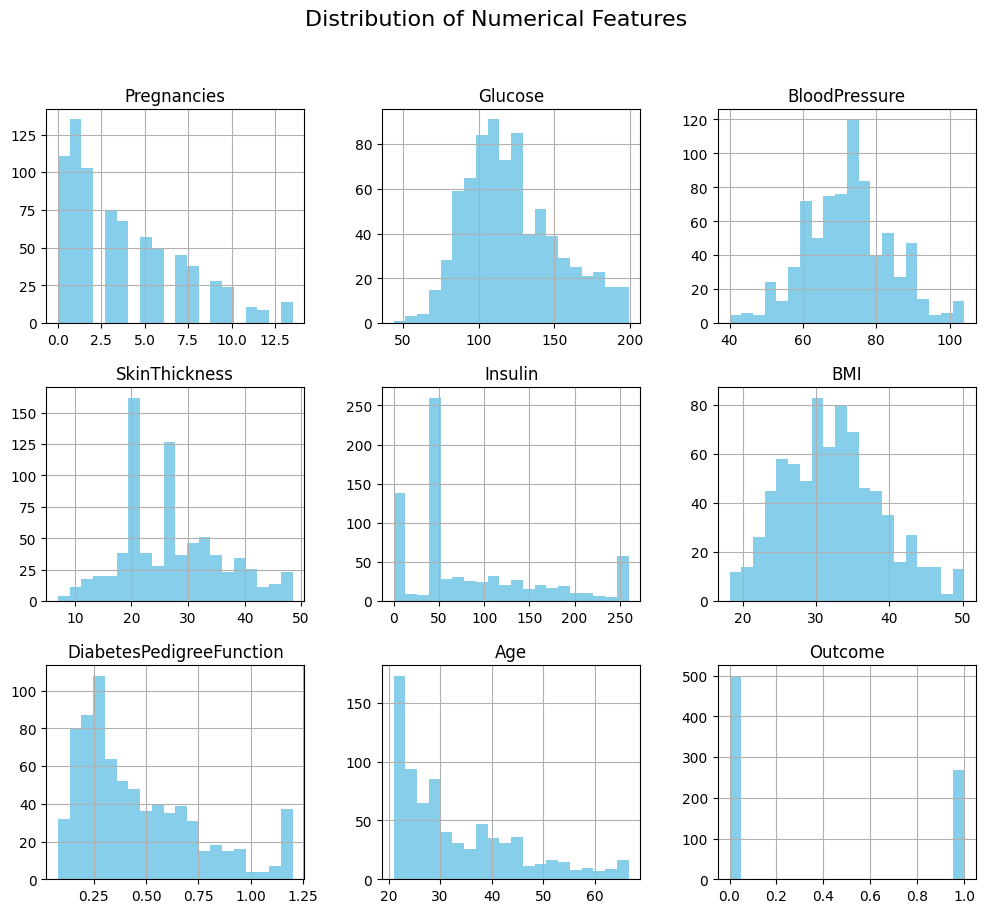

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

data.hist(bins=20, figsize=(12, 10), color='skyblue')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


##### Based on the heatmap:

- Strong Correlation with Outcome:

    1. Glucose (0.50) shows a strong positive correlation with the Outcome. This suggests that higher glucose levels are associated with an increased likelihood of diabetes.
    2. Age (0.24) and BMI (0.32) also show moderate positive correlations with the Outcome. This indicates that older individuals and those with higher BMI are more likely to have diabetes.
    3. Pregnancies (0.22) also has a moderate correlation with Outcome, suggesting that the number of pregnancies might be linked to diabetes risk.

- High Correlation Between Features:

    1. BMI and SkinThickness (0.59) have a strong correlation, which is logical because higher body fat percentage (BMI) is often associated with thicker skinfold measurements.
    2. Age and Pregnancies (0.55) show a moderate positive correlation, which makes sense as older women generally have had more pregnancies.

- Low to Negligible Correlation:

    1. Insulin has a low correlation with Outcome (0.019), which might indicate that insulin levels alone are not highly predictive of diabetes in this dataset.
    2. DiabetesPedigreeFunction has a weak correlation with all variables including Outcome (0.18), suggesting a relatively lower importance in predicting diabetes compared to features like Glucose or BMI.

##### Conclusion:
Glucose stands out as the most significant predictor of diabetes (Outcome) in this dataset, followed by BMI and Age. These features should likely be prioritized in predictive models.
Some features, like Insulin and BloodPressure, have weaker correlations with Outcome and may contribute less to predicting diabetes or may need further investigation.

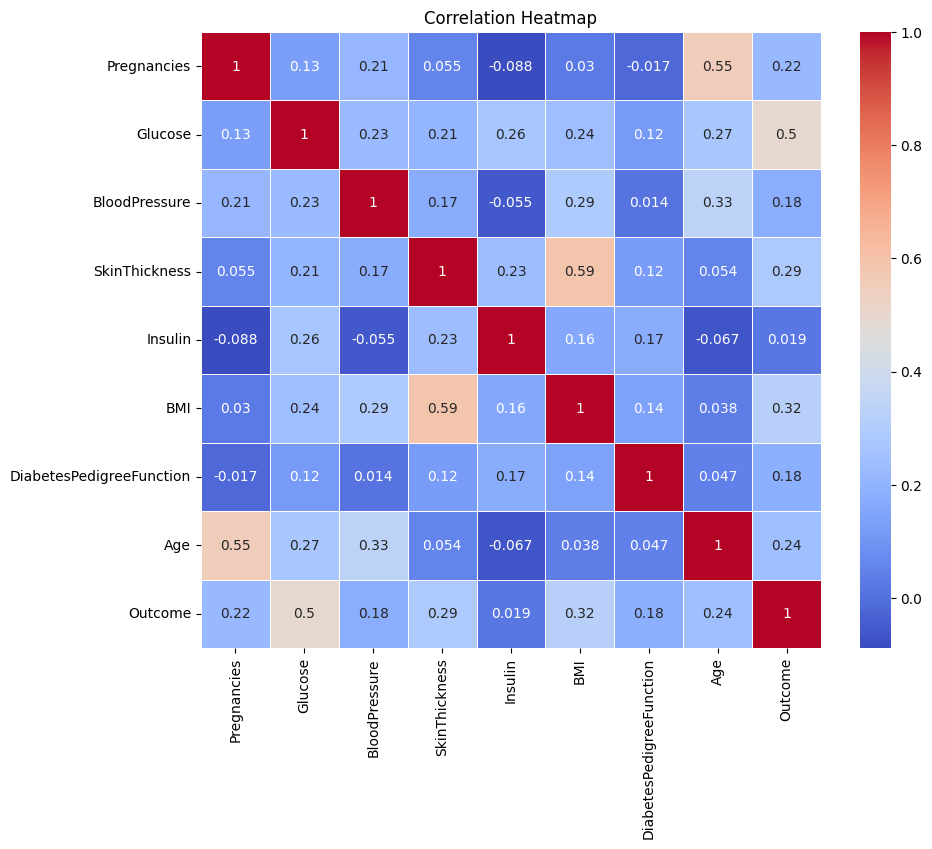

In [65]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Pairplot Outcome Explanation**

The pairplot provides a visualization of the distribution and relationships between different features for both classes of the **Outcome** variable (0: Non-diabetic, 1: Diabetic).

##### Key Observations:

1. **Glucose:**
   - Diabetic patients (orange) tend to have higher glucose levels than non-diabetic patients (blue). This is evident from the separation in the distribution plot in the first column.
   - There is a noticeable concentration of orange points at higher glucose levels, suggesting that glucose is an important factor in predicting diabetes.

2. **BMI:**
   - There is some overlap between the diabetic and non-diabetic groups in terms of BMI, but diabetic individuals tend to have slightly higher BMI.
   - The distribution shows that diabetic patients are more concentrated towards higher BMI values, though the separation between the two classes is less distinct than glucose.

3. **Age:**
   - Diabetic patients tend to be older. The orange points (Outcome = 1) appear more frequently in the older age groups compared to non-diabetic patients.
   - Age could be a contributing factor, though it does not show a very strong separation between the two classes.

4. **Insulin:**
   - There is a wide variation in insulin levels for both diabetic and non-diabetic individuals, with many low or zero values. The scatter points show less distinction between the two outcomes.
   - Insulin may not provide a clear distinction in this dataset for predicting diabetes, similar to what was observed in the correlation heatmap.

5. **Diabetes Pedigree Function:**
   - Both classes have overlapping distributions for the DiabetesPedigreeFunction, with no clear separation.
   - This feature appears to be less predictive based on this plot.

##### Relationships Between Features:
- **Glucose vs. BMI:** There is a positive correlation between glucose and BMI for diabetic patients (orange points tend to cluster in the upper-right), suggesting that individuals with higher BMI and glucose are more likely to be diabetic.
- **Age vs. Pregnancies:** There is a visible trend that older individuals tend to have had more pregnancies, particularly among those with diabetes.
- **Insulin and Other Features:** Insulin levels do not show a strong relationship with other features in distinguishing between the two outcome classes.

##### Conclusion:
The pairplot reinforces that **Glucose** and **BMI** are important predictors of diabetes, with a clearer distinction between diabetic and non-diabetic patients. **Age** also plays a role but is less distinct. **Insulin** and **Diabetes Pedigree Function** seem to contribute less towards differentiating between the two outcomes in this dataset.


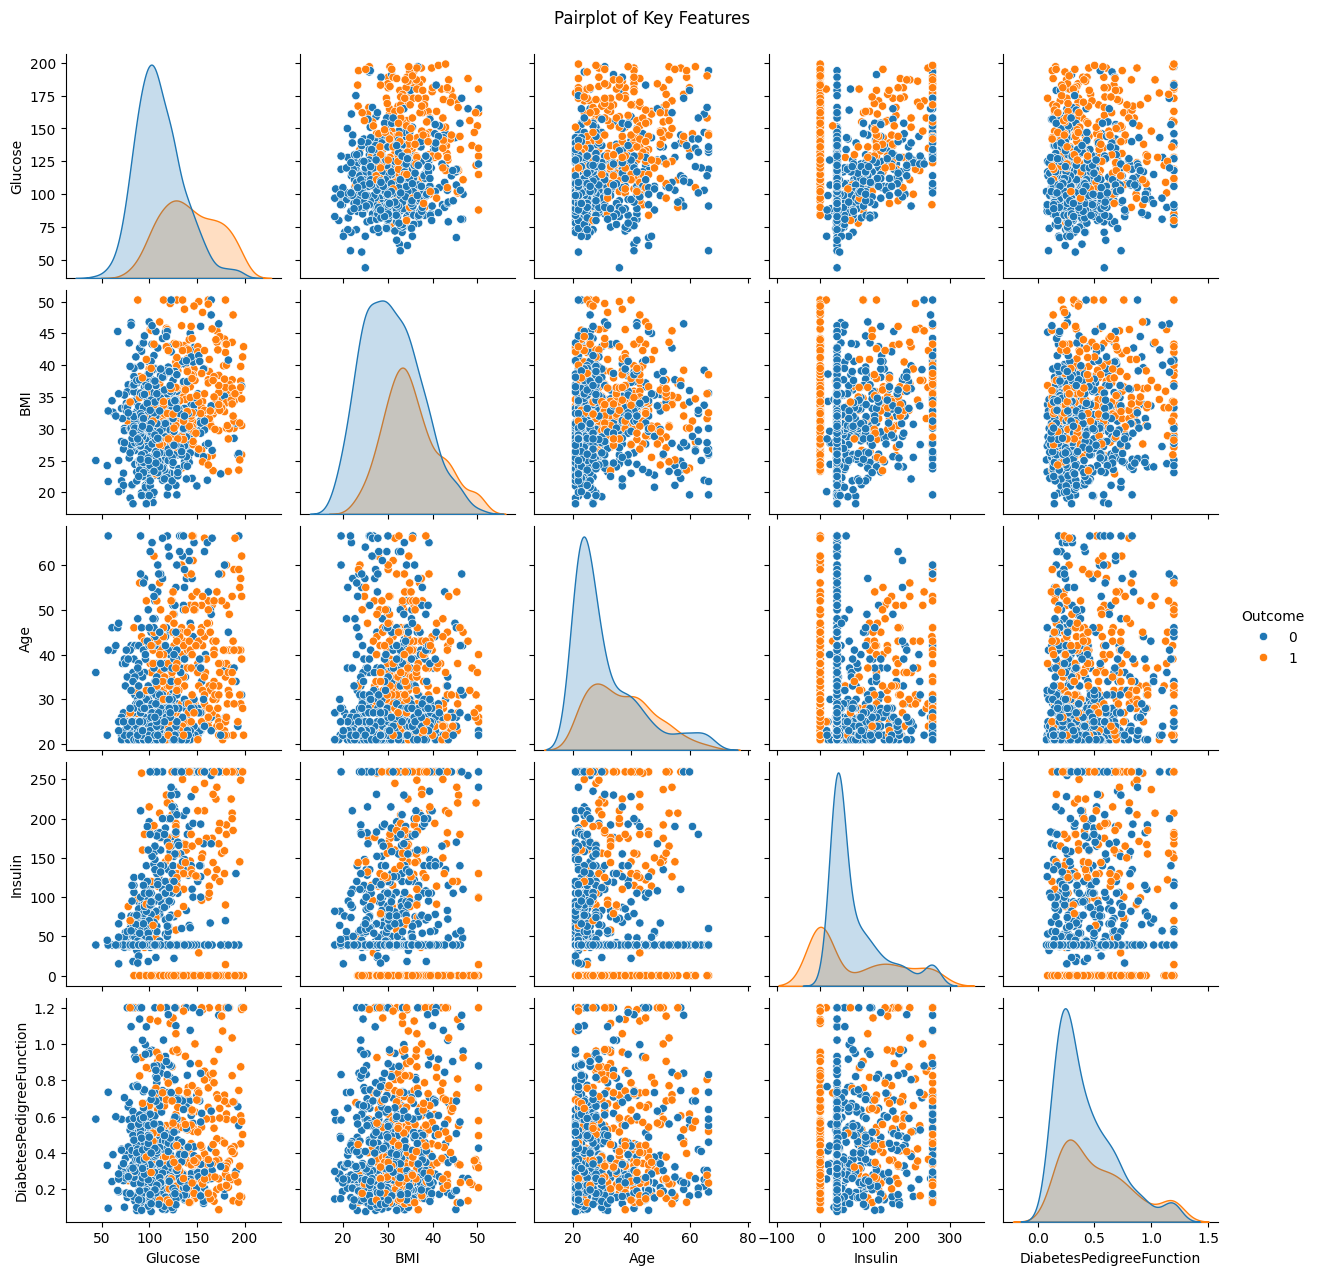

In [64]:
sns.pairplot(data, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction'])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

#### Count of Each Class in the dataset which on our case "Diabetic", "Non Diabetic"

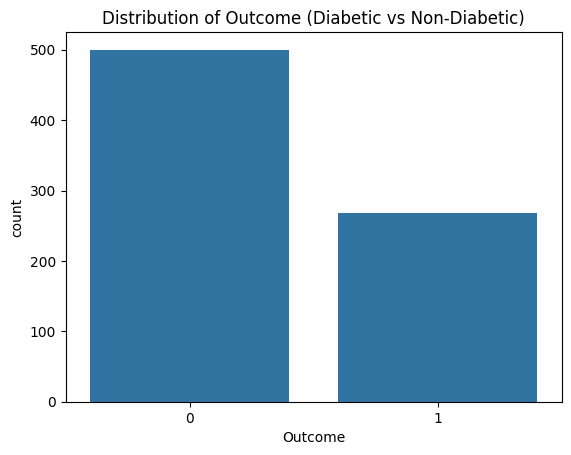

In [66]:
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome (Diabetic vs Non-Diabetic)')
plt.show()

##### Violin Plot of Glucose by Outcome Explanation

The Violin Plot provides a visual representation of the distribution of glucose levels among diabetic (Outcome = 1) and non-diabetic (Outcome = 0) individuals. This plot combines box plots and density plots, allowing us to observe not only the central tendency and spread of the data but also the distribution shape.

##### Key Observations:

1. **Distribution Shape:**
   - The plot displays two violins, one for each outcome group. The width of each violin at a given glucose level indicates the density of data points at that level.
   - The non-diabetic group (blue) shows a bimodal distribution, with two peaks around glucose levels of approximately 75-85 and 90-100. This suggests that there are two distinct subgroups within the non-diabetic population.
   - The diabetic group (orange) shows a right-skewed distribution, indicating that most diabetic patients have higher glucose levels, with a peak around 150-160 and extending towards higher values.

2. **Central Tendency:**
   - The median glucose level for the diabetic group is significantly higher than that of the non-diabetic group, as evidenced by the separation of the central lines (medians) within each violin.
   - The non-diabetic group has a median glucose level below 100, while the diabetic group has a median level well above 150, reinforcing that higher glucose levels are associated with diabetes.

3. **Spread and Outliers:**
   - The interquartile range (IQR) for the diabetic group is wider than that of the non-diabetic group, indicating greater variability in glucose levels among diabetic individuals.
   - The presence of outliers (points beyond the whiskers) is more pronounced in the diabetic group, indicating that some individuals exhibit extremely high glucose levels.

4. **Implications:**
   - The clear separation in glucose distribution between the two outcome groups indicates that glucose levels are a strong predictor of diabetes.
   - The overlap at lower glucose levels suggests that while most non-diabetic individuals have glucose levels below 100, there are some individuals with higher levels who may still be non-diabetic.

##### Conclusion:
The Violin Plot of Glucose by Outcome vividly illustrates the significant differences in glucose distribution between diabetic and non-diabetic individuals. This reinforces the notion that monitoring glucose levels is crucial in diabetes prediction and management.


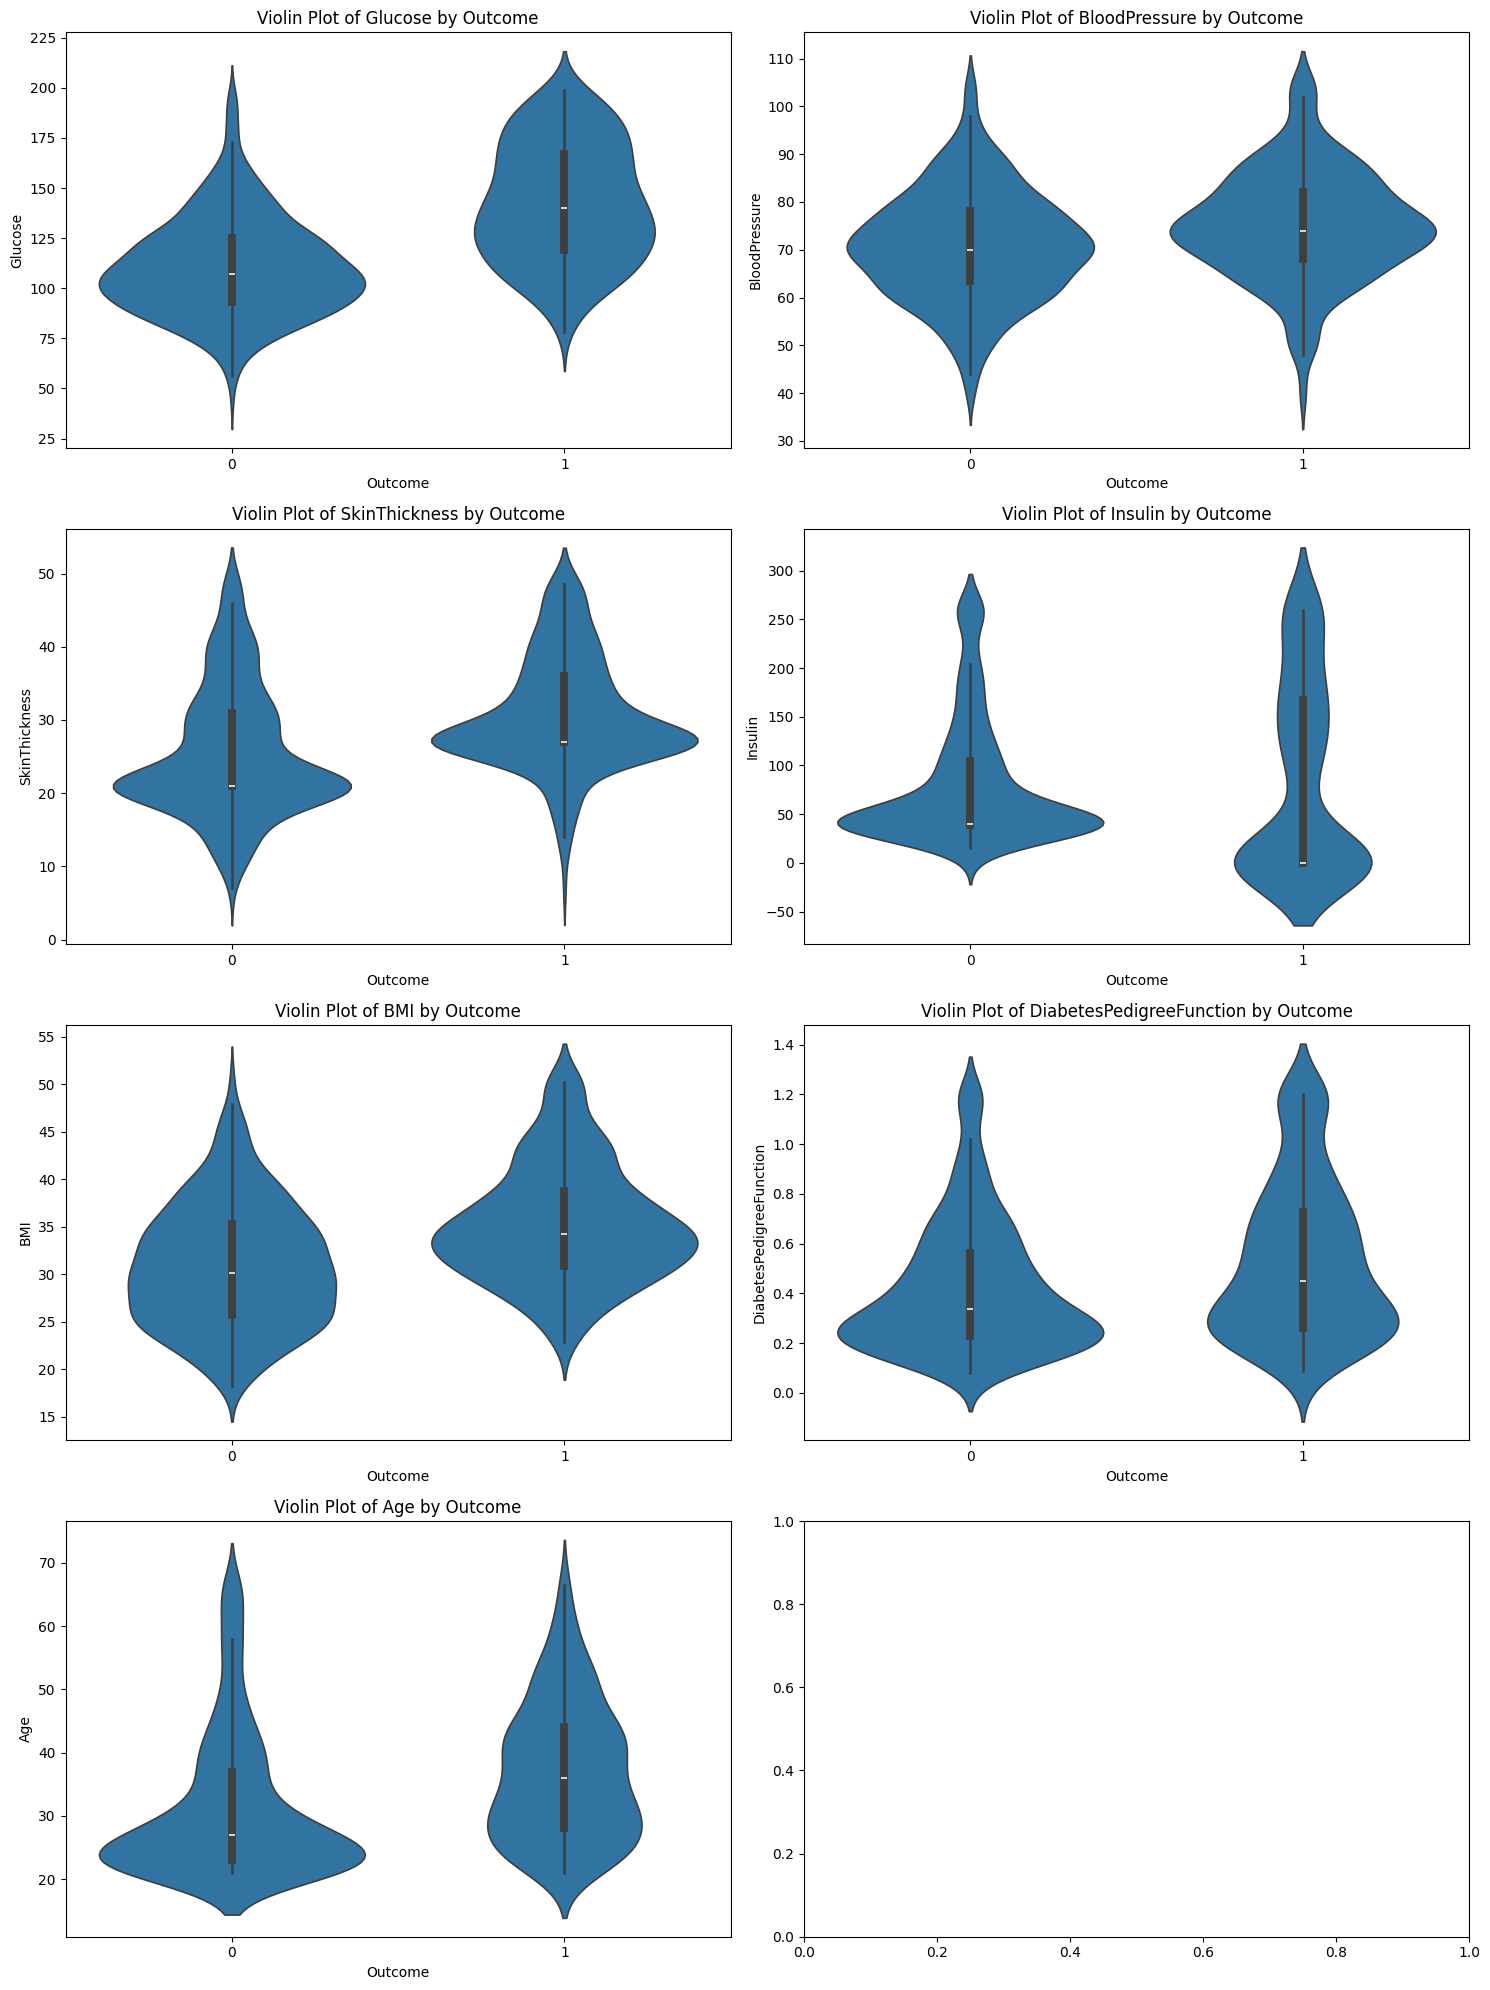

In [74]:
columns_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set the number of subplots
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(15, 5 * ((num_columns + 1) // 2)))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Iterate through each column and create a violin plot
for i, column in enumerate(columns_to_plot):
    sns.violinplot(x='Outcome', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {column} by Outcome')

# Adjust layout
plt.tight_layout()
plt.show()

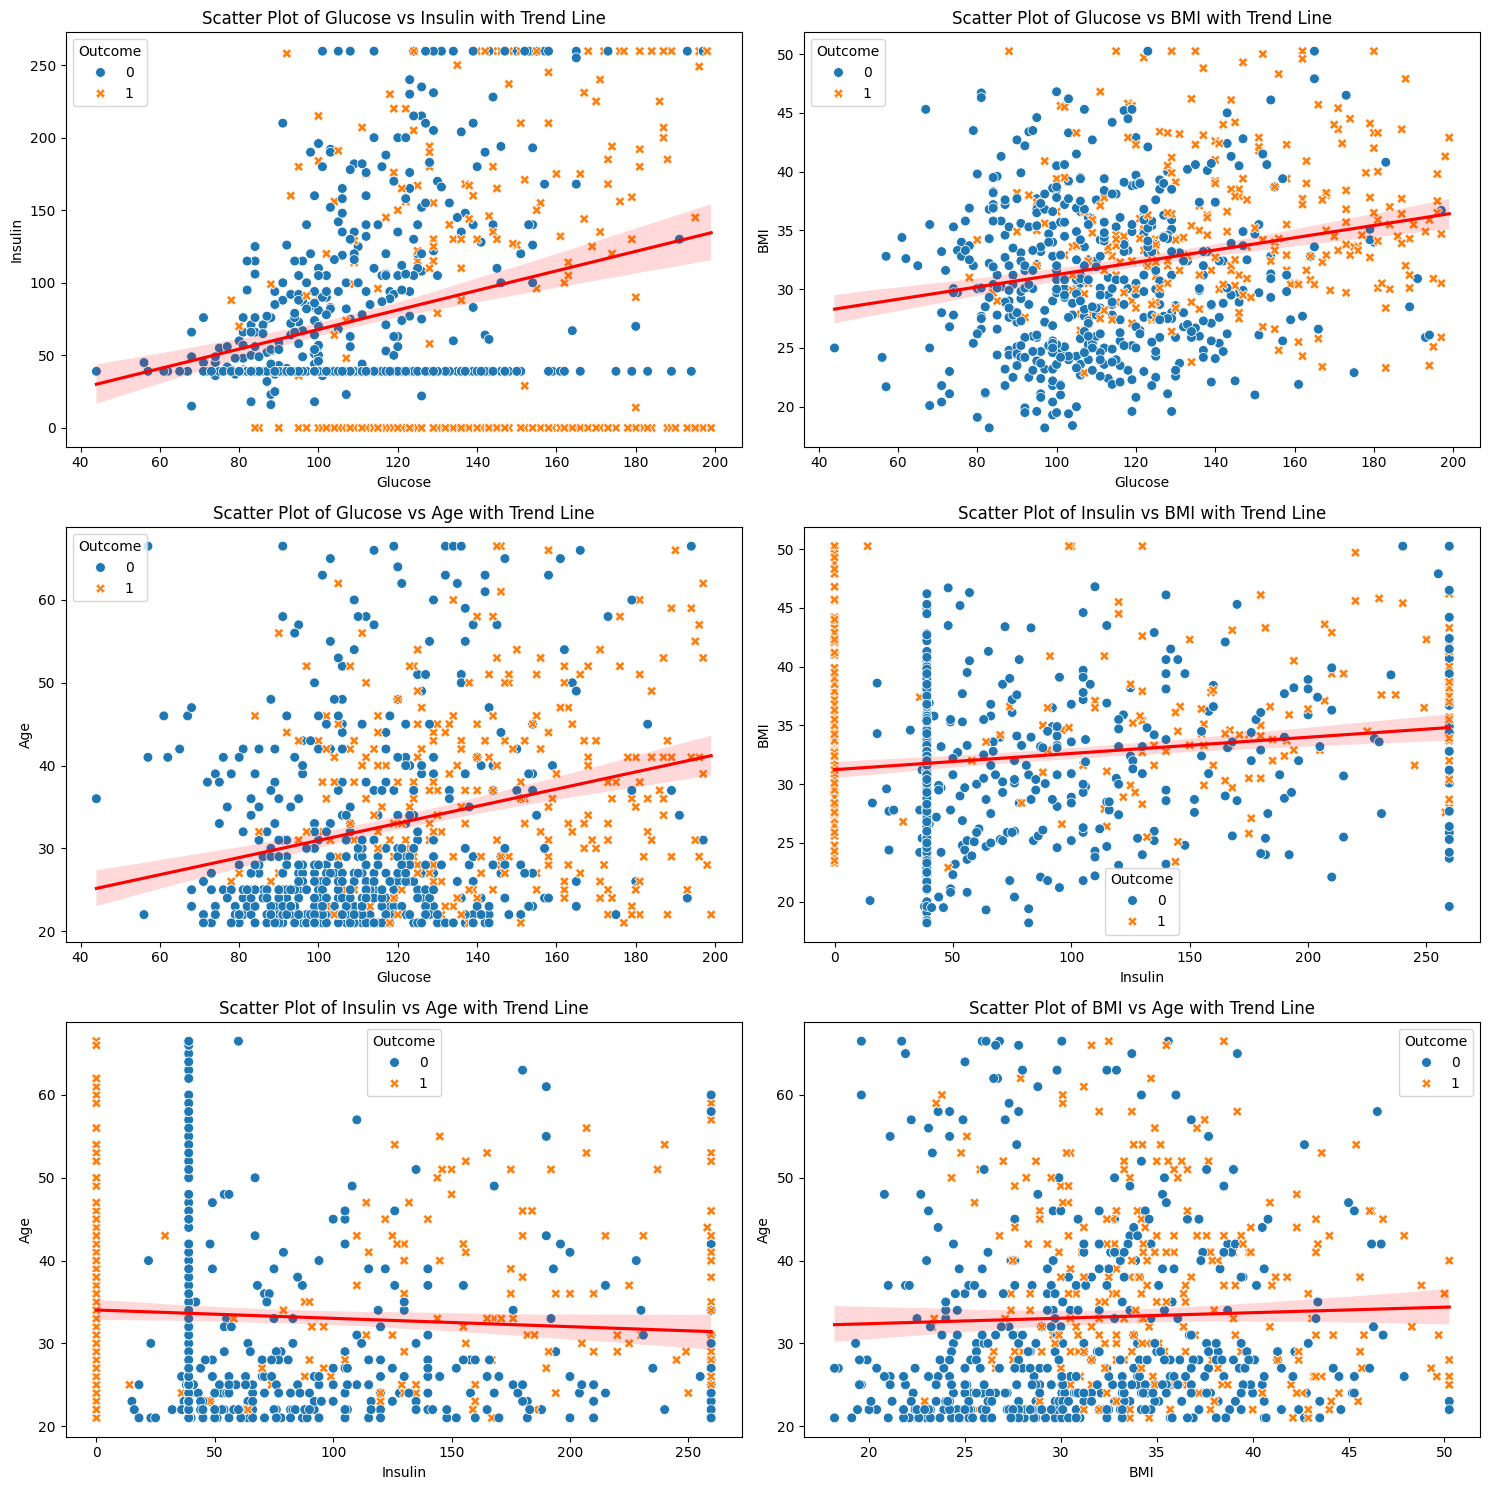

In [77]:
from itertools import combinations
# List of relevant columns to plot against each other
columns_to_plot = ['Glucose', 'Insulin', 'BMI', 'Age']

# Set up the number of combinations of pairs of columns
column_pairs = list(combinations(columns_to_plot, 2))

# Create a new figure
plt.figure(figsize=(15, 5 * ((len(column_pairs) + 1) // 2)))

# Iterate through each pair of columns and create a scatter plot with trend line
for i, (x_col, y_col) in enumerate(column_pairs):
    plt.subplot((len(column_pairs) + 1) // 2, 2, i + 1)  # Create subplots
    sns.scatterplot(x=x_col, y=y_col, data=data, hue='Outcome', style='Outcome', s=50)
    sns.regplot(x=x_col, y=y_col, data=data, scatter=False, color='gray', line_kws={"color": "red"})
    plt.title(f'Scatter Plot of {x_col} vs {y_col} with Trend Line')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Adjust layout
plt.tight_layout()
plt.show()

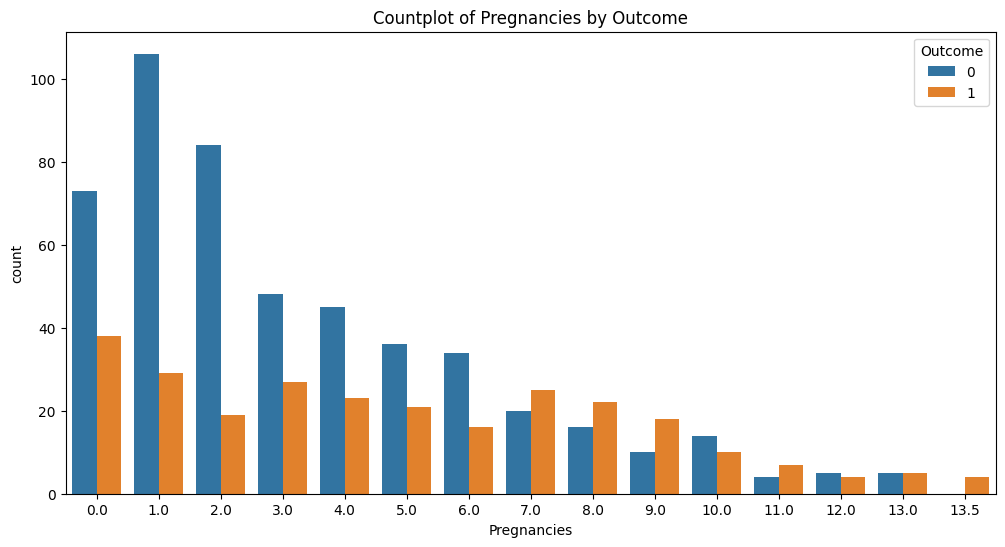

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=data)
plt.title('Countplot of Pregnancies by Outcome')
plt.show()

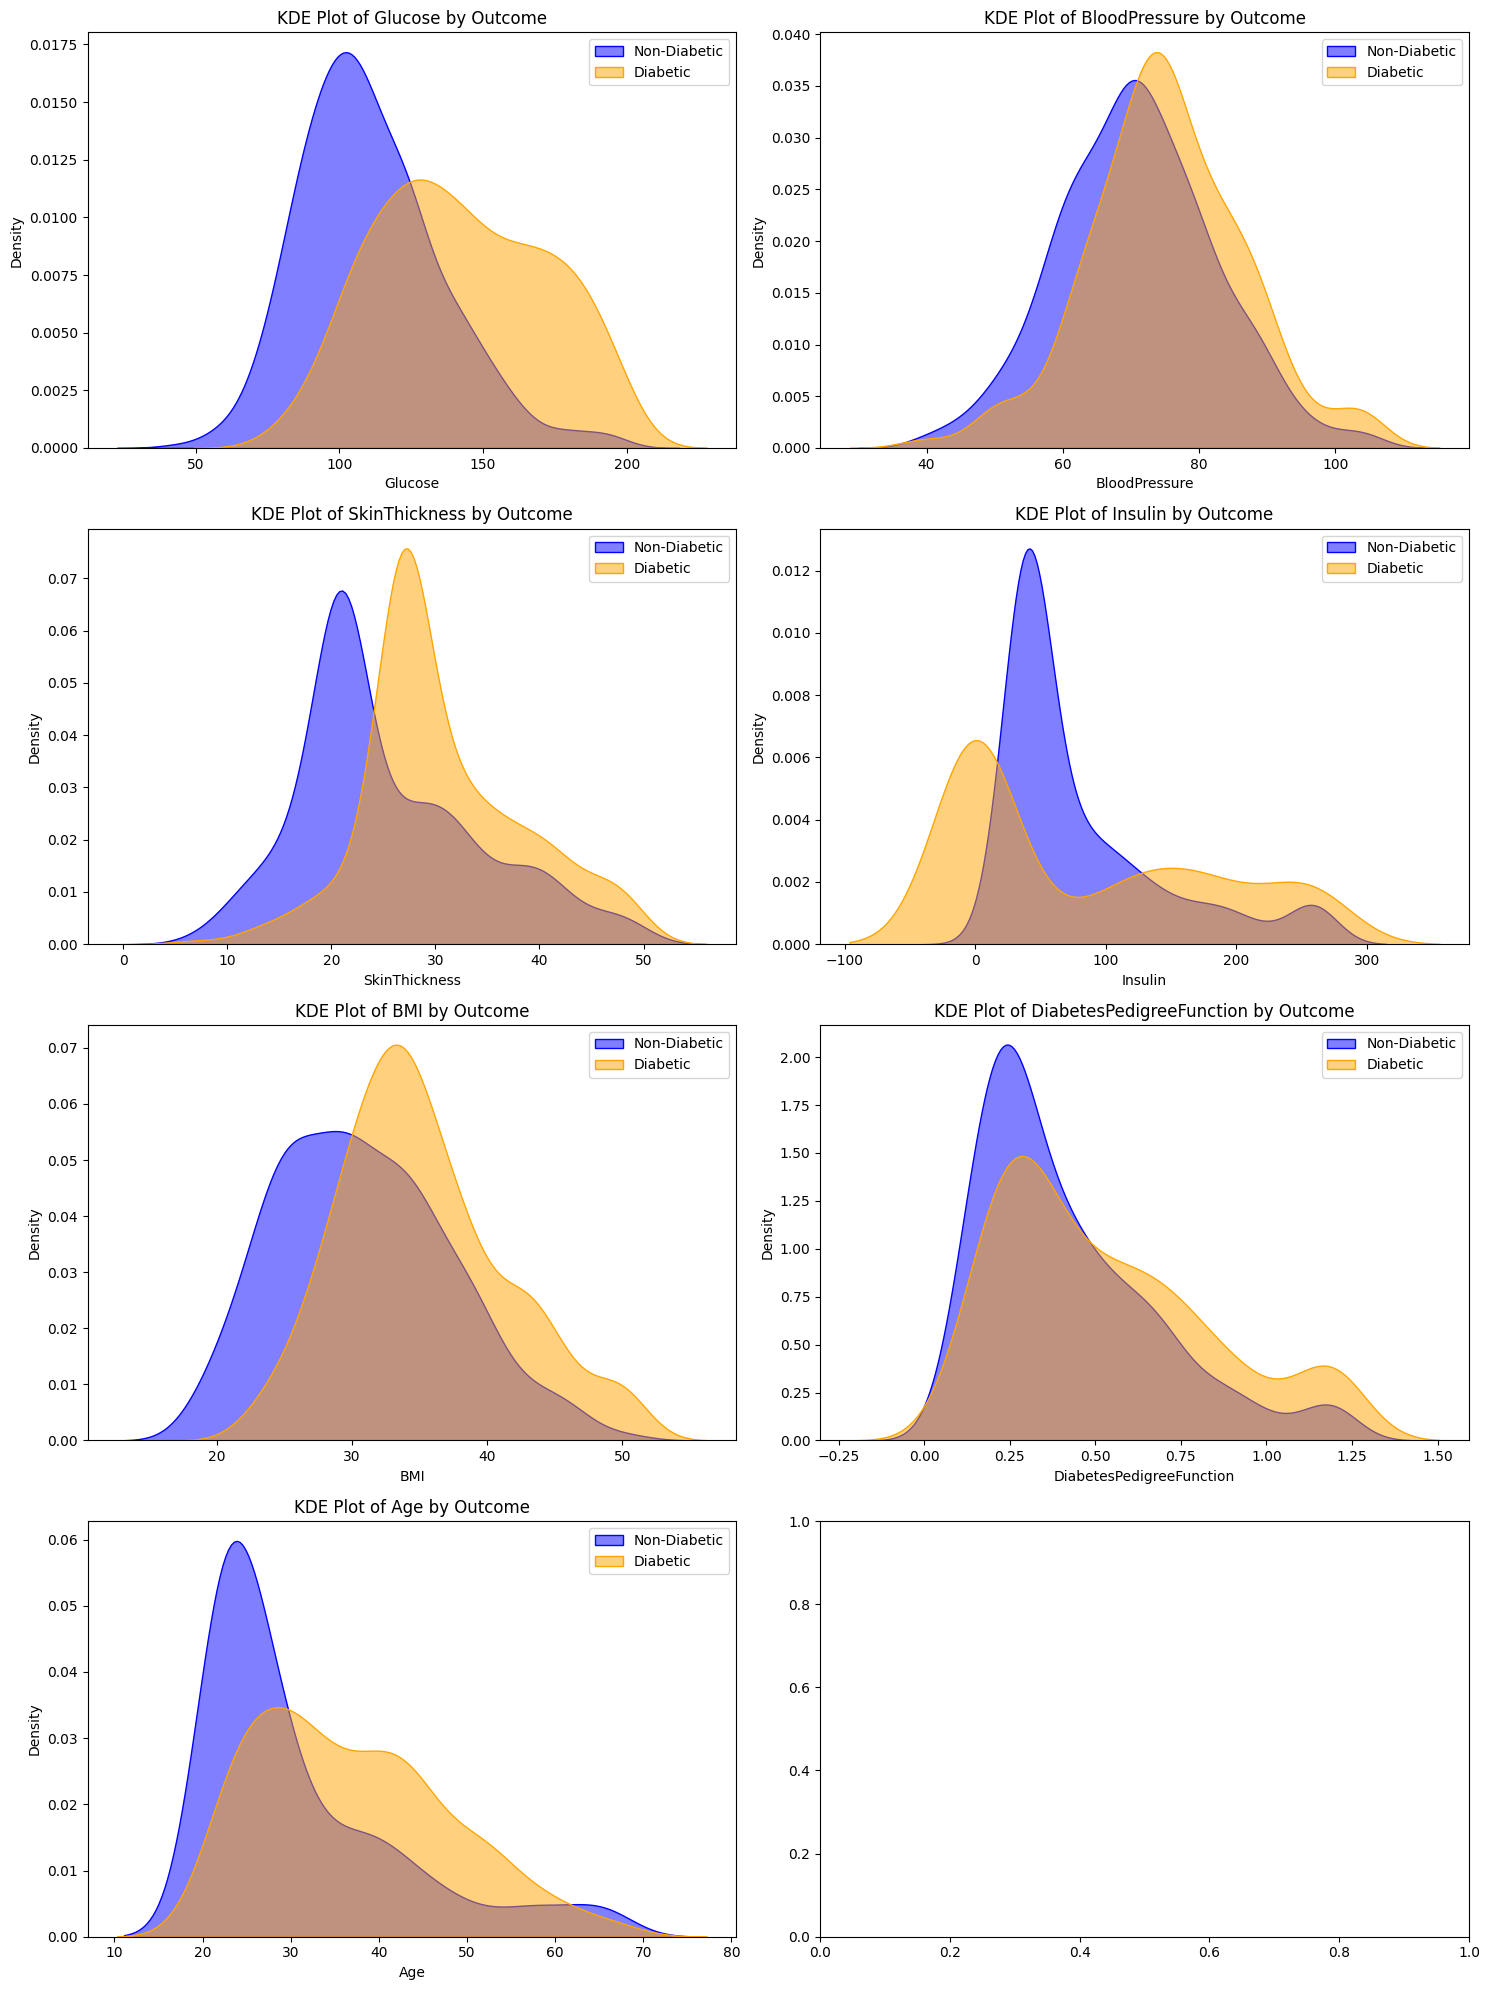

In [73]:
# List of columns to plot
columns_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set the number of subplots
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(15, 5 * ((num_columns + 1) // 2)))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Iterate through each column and create a KDE plot
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(data[data['Outcome'] == 0][column], label='Non-Diabetic', fill=True, ax=axes[i], color='blue', alpha=0.5)
    sns.kdeplot(data[data['Outcome'] == 1][column], label='Diabetic', fill=True, ax=axes[i], color='orange', alpha=0.5)
    axes[i].set_title(f'KDE Plot of {column} by Outcome')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Results & Interpretation

### Key Insights:
1. **Correlation Between Features and Outcome**: 
   - The strongest correlation with the diabetes outcome was observed with **Glucose** (0.5), followed by **BMI** (0.32) and **Age** (0.24). This indicates that higher glucose levels, body mass index, and age are associated with a higher likelihood of diabetes.
   
2. **Distributions of Glucose by Outcome**:
   - The KDE and violin plots demonstrated that non-diabetic individuals generally had lower glucose levels than diabetic individuals, indicating that glucose management is critical for diabetes prevention.

3. **Trends in Glucose vs. Insulin**: 
   - A positive relationship was found between **Glucose** and **Insulin**, suggesting that higher insulin levels correlate with higher glucose levels, reflecting the body's insulin resistance in diabetic patients.

4. **Impact of BMI and Age**: 
   - Both BMI and age appeared to be significant indicators of diabetes risk, as seen in their respective visualizations, highlighting the importance of weight management and age-related factors in diabetes onset.

5. **Non-Linear Relationships**: 
   - Scatter plots revealed non-linear relationships between several pairs of features, indicating the potential need for more complex modeling approaches to capture these dynamics.

### Interpretation:
The analysis indicates that glucose levels are a significant predictor of diabetes outcomes, aligning with existing medical literature that emphasizes the importance of blood glucose management in diabetes care. The strong correlation between glucose and insulin levels suggests that insulin resistance plays a critical role in the progression of diabetes, underscoring the necessity for monitoring insulin levels in at-risk populations.

The insights drawn from the distributions and relationships among features indicate that interventions targeting weight loss (reducing BMI) and lifestyle changes (including physical activity and diet) could be effective strategies for diabetes prevention. Given the association between age and diabetes risk, targeted screening and early intervention in older adults may also be beneficial.

Moreover, the identified non-linear relationships imply that traditional linear models may not sufficiently capture the complexities of the diabetes risk factors. Future analyses could benefit from employing machine learning techniques that account for these non-linearities and interactions among variables.

Overall, these findings contribute to a deeper understanding of diabetes risk factors and can inform healthcare strategies aimed at prevention and management, ultimately leading to improved patient outcomes.


## Conclusions & Recommendations

### Summary of Findings:
1. **Key Predictors of Diabetes**: The analysis revealed that **Glucose** is the strongest predictor of diabetes outcomes, with a correlation coefficient of 0.5. Other notable predictors include **BMI** (0.32) and **Age** (0.24).
   
2. **Distribution Insights**: Non-diabetic individuals exhibited significantly lower glucose levels compared to diabetic individuals, indicating the critical role of glucose management in diabetes prevention.

3. **Relationship Between Insulin and Glucose**: There exists a positive relationship between **Glucose** and **Insulin**, suggesting that insulin resistance may be a significant factor for individuals diagnosed with diabetes.

4. **Influence of Age and BMI**: Both **Age** and **BMI** were identified as important factors affecting diabetes risk, emphasizing the need for lifestyle and dietary interventions among these populations.

5. **Non-Linear Relationships**: The analysis highlighted non-linear relationships between some features, which indicates the complexity of diabetes risk factors and the limitations of traditional linear modeling.

### Recommendations:
1. **Implement Screening Programs**: Healthcare providers should consider implementing regular screening for glucose levels in patients, especially for those with a high BMI or older age, to facilitate early detection and management of diabetes risk.

2. **Promote Lifestyle Changes**: Initiatives promoting healthy eating and physical activity should be prioritized, particularly for individuals with elevated BMI and age-related risk factors. Programs could include community fitness initiatives and nutritional workshops.

3. **Enhance Monitoring of Insulin Levels**: Given the correlation between insulin and glucose, monitoring insulin levels in conjunction with glucose testing can provide a more comprehensive understanding of an individual’s risk and guide treatment decisions.

4. **Explore Machine Learning Models**: Future studies should employ machine learning techniques to better capture the non-linear relationships among variables. These models may provide more accurate risk assessments and predictive capabilities.

## Limitations & Future Work:
1. **Data Limitations**: The analysis is limited by the dataset used, which may not encompass all relevant variables associated with diabetes risk, such as genetics, lifestyle factors, and socio-economic status.

2. **Generalizability**: The findings may not be generalizable beyond the sample population, as the dataset comprises specific demographic characteristics.

3. **Cross-Sectional Nature**: The cross-sectional nature of the data limits the ability to draw causal inferences regarding the relationships between the variables.

4. **Future Investigations**: Future work should aim to incorporate a broader range of data, including genetic factors and detailed lifestyle information. Longitudinal studies could also provide insights into the temporal relationships between predictors and diabetes development.

5. **Evaluate Interventions**: Future research should evaluate the effectiveness of specific interventions aimed at reducing diabetes risk, focusing on the impact of lifestyle modifications on glucose and insulin levels over time.
